In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

In [12]:
df=pd.read_csv(r'gd_data.csv',nrows=200).rename(columns={"x":"Area",'y':"Price"})

In [14]:
df.head()

,Area,Price
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [15]:
#Scaling
df=(df-df.mean())/df.std()

In [17]:
df.head()

,Area,Price
0,-0.758416,-0.838286
1,0.170840,0.088614
2,-1.080081,-0.993185
3,-0.258047,-0.300461
4,1.493242,1.513015


<AxesSubplot:xlabel='Area', ylabel='Price'>

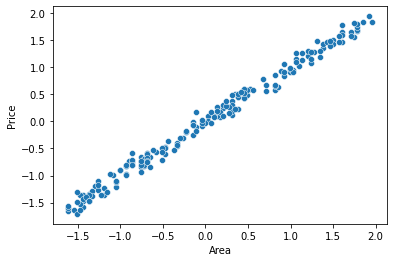

In [16]:
import seaborn as sns
sns.scatterplot(x=df["Area"],y=df["Price"])

In [18]:
X=np.array(df["Area"])
y=np.array(df["Price"])

In [30]:
def gradient_descent(X,y,m_current=0,c_current=0,lr=0.1,iterations=1000):
    N=float(len(y))
    
    gd_df=pd.DataFrame(columns=["m","c","cost"])
    for i in range(iterations):
        
        y_pred=m_current*X+c_current  #y_predictions
        
        cost = sum([k**2 for k in y-y_pred])/N ## Cost Function
        
        m_gradient=(-2/N)*sum((y-y_pred)*X) #dj/dm
        
        c_gradient=(-2/N)*sum(y-y_pred) #dj/dc
        
        m_current=m_current-lr*m_gradient
        
        c_current=c_current-lr*c_gradient
        
        gd_df.loc[i]=[m_current,c_current,cost]
        
    return gd_df

In [31]:
%%time
gd_df=gradient_descent(X,y)

CPU times: user 815 ms, sys: 10.9 ms, total: 826 ms
Wall time: 818 ms


In [32]:
gd_df

,m,c,cost
0,0.198001,-4.261869e-17,0.995000
1,0.356600,-8.145568e-17,0.641963
2,0.483638,-1.150122e-16,0.415454
3,0.585396,-1.470005e-16,0.270126
4,0.666903,-1.745479e-16,0.176883
...,...,...,...
995,0.994982,-3.219716e-16,0.009962
996,0.994982,-3.232345e-16,0.009962
997,0.994982,-3.243864e-16,0.009962
998,0.994982,-3.255382e-16,0.009962


<AxesSubplot:>

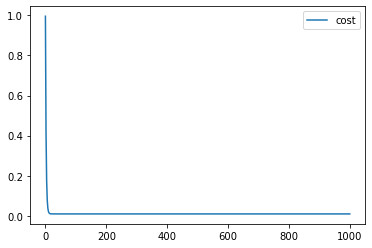

In [33]:
gd_df.plot.line(y=["cost"])

In [7]:
def gradient_descent(X,y,m_current=0,c_current=0,lr=0.001,iterations=1000):
    N=float(len(y))
    
    gd_df=pd.DataFrame(columns=["m","c","cost"])
    
    for i in range(iterations):
        
        y_pred=m_current*X+c_current#y_predictions
        
        cost=sum([k**2 for k in y-y_pred])/N ## Cost Function
        
        m_gradient=(-2/N)*sum((y-y_pred)*X)#(dj/dm)
        
        c_gradient =(-2/N)*sum(y-y_pred)
        
        m_current=m_current-lr*m_gradient
        
        c_current=c_current-lr*c_gradient
        
        gd_df.loc[i]=[m_current,c_current,cost]
        
    return gd_df
        
        
        